In [2]:
print(5 and 10)

10


In [3]:
3+2*2

7

In [4]:
("PythOn").lower()

'python'

In [6]:
print(4%2)

0


In [7]:
print(2%4)

2


In [8]:
print(5 or 10)

5


In [9]:
print(0 or 8)

8


In [12]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [14]:
arr = np.array([1,2,3,4,5,6])

In [15]:
arr.dtype

dtype('int64')

In [16]:
np.average(arr)

3.5

In [17]:
np.absolute(arr)

array([1, 2, 3, 4, 5, 6])

In [20]:
import array as arr

c = arr.array('f' , [1.1,2.2,3.3])
print(c[1])

2.200000047683716


In [22]:
print(round(c[2]))

3


In [23]:
type(arr)

module

In [24]:
print(type(arr))

<class 'module'>


In [25]:
df = pd.read_csv("/Users/thomassimmons/Downloads/titanic.csv")

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [31]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [33]:
df['Age'] = df['Age'].astype('int64')

In [34]:
df['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    28
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [35]:
df['Cabin'].isnull().sum()

687

In [36]:
df.drop(columns=['Embarked'], inplace=True)

In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin'],
      dtype='object')

In [38]:
print(type([]))

<class 'list'>


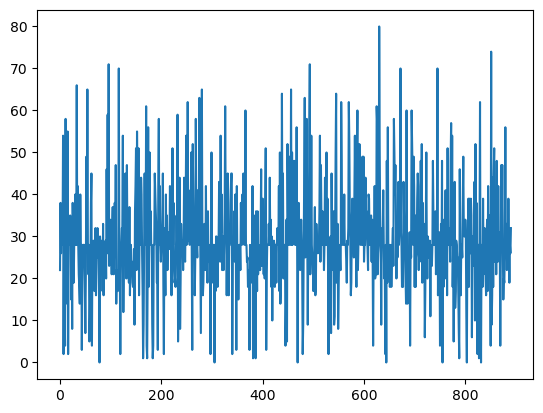

In [41]:
plt.plot(df['Age'])

In [43]:
df.groupby('Age')['Survived'].mean()

Age
0     1.000000
1     0.714286
2     0.300000
3     0.833333
4     0.700000
        ...   
66    0.000000
70    0.000000
71    0.000000
74    0.000000
80    1.000000
Name: Survived, Length: 71, dtype: float64

In [44]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [46]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

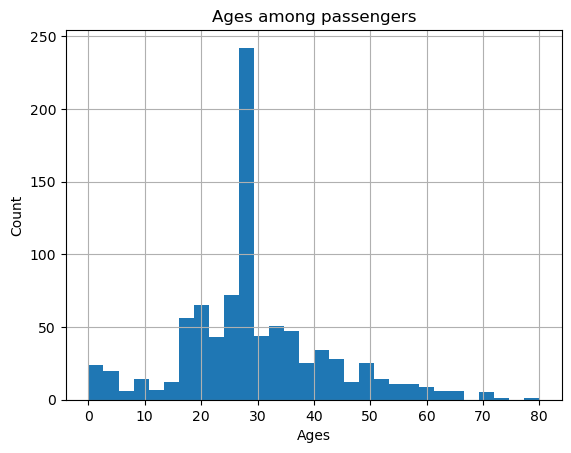

In [49]:
df['Age'].hist(bins = 30)
plt.title("Ages among passengers")
plt.xlabel("Ages")
plt.ylabel("Count")
plt.show()

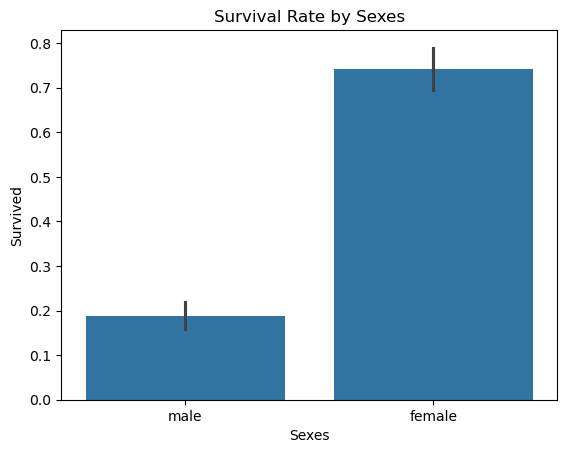

In [52]:
import seaborn as sns

sns.barplot(x = "Sex", y="Survived", data=df)
plt.xlabel("Sexes")
plt.ylabel("Survived")
plt.title("Survival Rate by Sexes")
plt.show()

In [54]:
conn = sqlite3.connect(':memory:')

In [55]:
conn

In [56]:
cursor = conn.cursor()

In [57]:
df.to_sql('titanic', conn, index=False, if_exists='replace')

891

In [58]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('titanic',)]


In [60]:
cursor.execute("PRAGMA table_info (titanic);")
columns = cursor.fetchall()
for col in columns:
    print(col)

(0, 'PassengerId', 'INTEGER', 0, None, 0)
(1, 'Survived', 'INTEGER', 0, None, 0)
(2, 'Pclass', 'INTEGER', 0, None, 0)
(3, 'Name', 'TEXT', 0, None, 0)
(4, 'Sex', 'TEXT', 0, None, 0)
(5, 'Age', 'INTEGER', 0, None, 0)
(6, 'SibSp', 'INTEGER', 0, None, 0)
(7, 'Parch', 'INTEGER', 0, None, 0)
(8, 'Ticket', 'TEXT', 0, None, 0)
(9, 'Fare', 'REAL', 0, None, 0)
(10, 'Cabin', 'TEXT', 0, None, 0)


In [62]:
query1 = """
SELECT Sex, AVG(Survived) AS SurvivalRate
FROM titanic
GROUP BY Sex
LIMIT 5;"""

pd.read_sql_query(query1, conn)

,Sex,SurvivalRate
0,female,0.742038
1,male,0.188908
